In [388]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [389]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [390]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [391]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    #'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [392]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'kp', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'score', 'almostRatio'] = '-'

original_df.to_csv('original_df.csv')

In [393]:
original_df = pd.read_csv('original_df.csv')
print(set(original_df['objective']))

{'score', 'knowledge', '-', 'kp'}


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [394]:
set(original_df['playerDepth'])


{'-', 1, '1', 2, '2'}

In [409]:
original_df.head()


In [396]:
original_df.columns.values.tolist()

['Unnamed: 0',
 'EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'Q1ReachedKnowledgeStep',
 'Q2ReachedKnowledgeStep',
 'Q3ReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'almostRatio',
 'playerDepth',
 'Sum_Matched']

In [410]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           0.75        100           485   
                                                200           484   
                                                400           491   
                                    1.0         100           477   
                                                200           482   
                                                400           492   
                        2           0.75        100           485   
                                                200           485   
                                                400           487   
                                    1.0         100           483   
                                                200           486   
                                                400           482   
              kp        1           -           100           491   
                                                200           485   
                                                400           487   
                        2           -           100           346   
                                                200           302   
                                                400           290   
              score     1           -           100           483   
                                                200           484   
                                                400           490   
                        2           -           100           484   
                                                200           486   
                                                400           482   
       random -         -           -           -             414   
1      mcts   knowledge 1           0.75        100           449   
                                                200           444   
                                                400           444   
                                    1.0         100           440   
                                                200           453   
                                                400           453   
                        2           0.75        100           462   
                                                200           440   
                                                400           449   
                                    1.0         100           436   
                                                200           461   
                                                400           446   
              kp        1           -           100           442   
                                                200           445   
                                                400           463   
                        2           -           100           330   
                                                200           283   
                                                400           263   
              score     1           -           100           462   
                                                200           469   
                                                400           448   
                        2           -           100           432   
                                                200           440   
                                                400           455   
       random -         -           -           -             261   
2      mcts   knowledge 1           0.75        100           430   
                                                200           453   
                                                400           457   
                                    1.0         100           447   
                                                200           473   
                                                400      

In [416]:
original_df = original_df[
    (original_df['ReachedKnowledgeStep'] != -1) &
    (original_df['Q1ReachedKnowledgeStep'] != -1) &
    (original_df['Q2ReachedKnowledgeStep'] != -1) &
    (original_df['Q3ReachedKnowledgeStep'] != -1)
]

for i in range(5):
    original_df['playerDepth'] = original_df['playerDepth'].replace(str(i), i)
for i in range(100, 1000, 100):
    original_df['simulation'] = original_df['simulation'].replace(str(i), i)

In [411]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           0.75        100           485   
                                                200           484   
                                                400           491   
                                    1.0         100           477   
                                                200           482   
                                                400           492   
                        2           0.75        100           485   
                                                200           485   
                                                400           487   
                                    1.0         100           483   
                                                200           486   
                                                400           482   
              kp        1           -           100           491   
                                                200           485   
                                                400           487   
                        2           -           100           346   
                                                200           302   
                                                400           290   
              score     1           -           100           483   
                                                200           484   
                                                400           490   
                        2           -           100           484   
                                                200           486   
                                                400           482   
       random -         -           -           -             414   
1      mcts   knowledge 1           0.75        100           449   
                                                200           444   
                                                400           444   
                                    1.0         100           440   
                                                200           453   
                                                400           453   
                        2           0.75        100           462   
                                                200           440   
                                                400           449   
                                    1.0         100           436   
                                                200           461   
                                                400           446   
              kp        1           -           100           442   
                                                200           445   
                                                400           463   
                        2           -           100           330   
                                                200           283   
                                                400           263   
              score     1           -           100           462   
                                                200           469   
                                                400           448   
                        2           -           100           432   
                                                200           440   
                                                400           455   
       random -         -           -           -             261   
2      mcts   knowledge 1           0.75        100           430   
                                                200           453   
                                                400           457   
                                    1.0         100           447   
                                                200           473   
                                                400      

In [425]:
pd.set_option('display.max_rows', None)


match_result = original_df.copy()
match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
match_result = match_result[~match_result['playerDepth'].isin([2])]
match_result = match_result[~match_result['simulation'].isin([100, 400])]

# print(set(match_result['playerDepth']))
pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == "":


method Q1ReachedKnowledgeStep  \
                                         count                   mean   
method objective playerDepth simulation                                 
mcts   knowledge 1           200          1859              78.380312   
       kp        1           200          1841              76.814775   
       score     1           200          1879              77.614156   
random -         -           -            1317             104.224753   

                                        Q2ReachedKnowledgeStep  \
                                                          mean   
method objective playerDepth simulation                          
mcts   knowledge 1           200                    102.269500   
       kp        1           200                     98.539924   
       score     1           200                    102.043108   
random -         -           -                      131.037206   

                                        Q3ReachedKnowledgeStep  \
                                                          mean   
method objective playerDepth simulation                          
mcts   knowledge 1           200                    135.472835   
       kp        1           200                    132.038566   
       score     1           200                    132.852581   
random -         -           -                      171.634776   

                                        ReachedKnowledgeStep  \
                                                        mean   
method objective playerDepth simulation                        
mcts   knowledge 1           200                  145.286713   
       kp        1           200                  141.712656   
       score     1           200                  142.086216   
random -         -           -                    181.931663   

                                        Matched_HorizontalPiece  \
                                                           mean   
method objective playerDepth simulation                           
mcts   knowledge 1           200                      77.718666   
       kp        1           200                      77.050516   
       score     1           200                      77.356573   
random -         -           -                        45.876993   

                                        Matched_VerticalPiece  \
                                                         mean   
method objective playerDepth simulation                         
mcts   knowledge 1           200                    57.850995   
       kp        1           200                    57.601304   
       score     1           200                    57.523683   
random -         -           -                      32.411541   

                                        Matched_CrossPiece  \
                                                      mean   
method objective playerDepth simulation                      
mcts   knowledge 1           200                 11.374933   
       kp        1           200                 11.537208   
       score     1           200                 11.439596   
random -         -           -                    6.592255   

                                        Matched_RocketPiece Matched_BombPiece  \
                                                       mean              mean   
method objective playerDepth simulation                                         
mcts   knowledge 1           200                 125.355030          9.756859   
       kp        1           200                 125.423140          9.819663   
       score     1           200                 125.666844          9.893560   
random -         -           -                    83.173121          6.913440   

                                        Matched_RainbowPiece Sum_Matched  
                                                        mean        mean  
method objective playerDepth simulation                                   

In [401]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'kp':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

melted_df = original_df.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation', 'player']).sample(n=100, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
# melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')	125.0
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="player", data=melted_df)
plt.xticks(rotation=45)

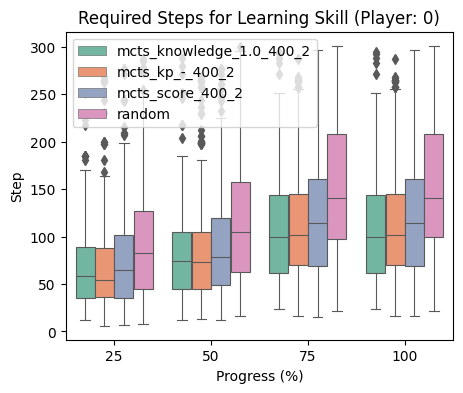

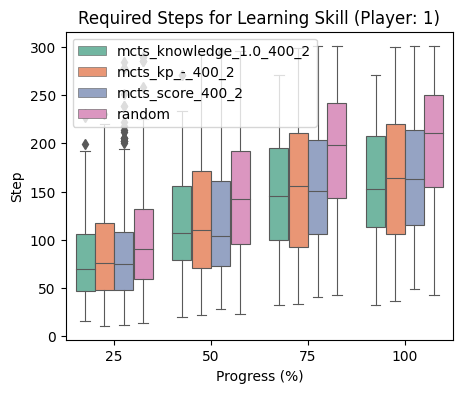

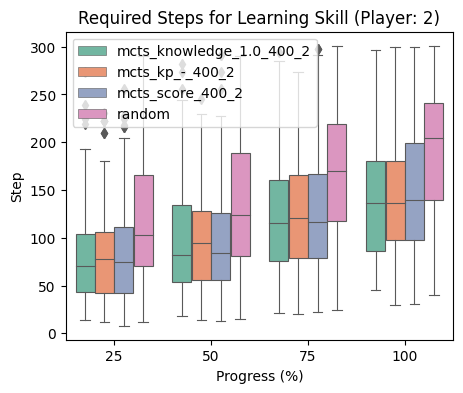

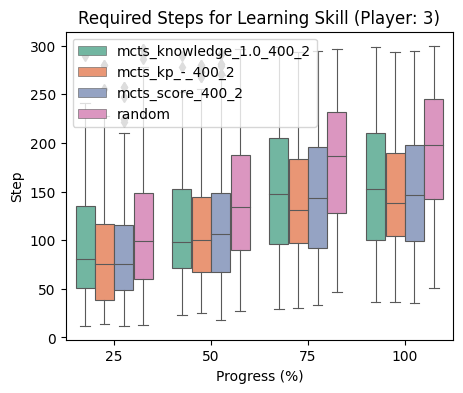

In [402]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

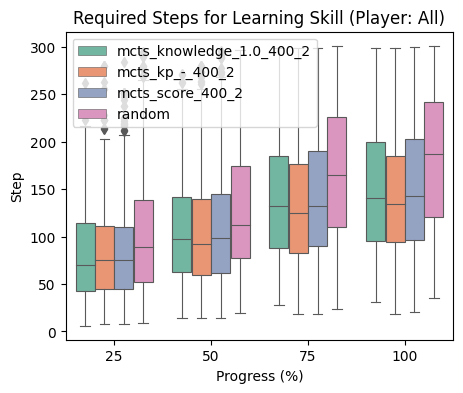

In [403]:
player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = [
'25', '50', '75', '100',
# Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
]

# print(player_df.keys())
sns.set_palette('Set2')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Required Steps for Learning Skill (Player: All)')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.savefig(f'./figures/learning_steps_pA', dpi=300)
plt.show()



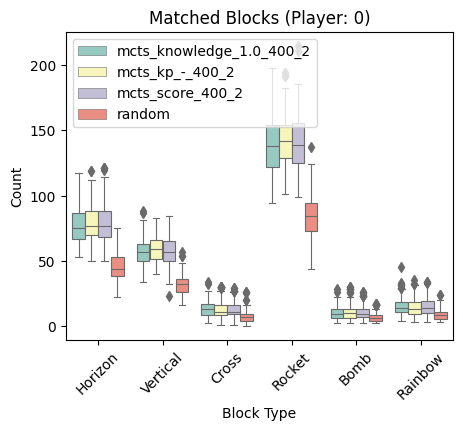

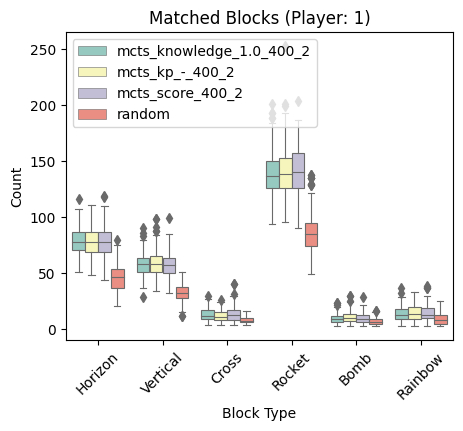

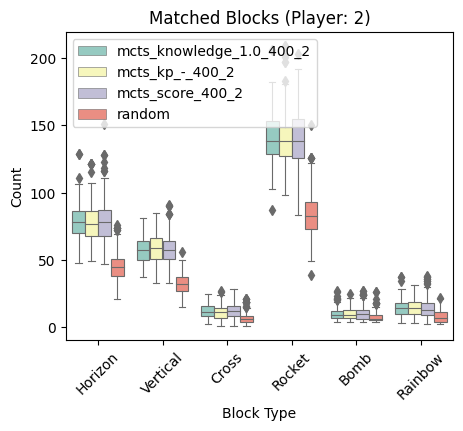

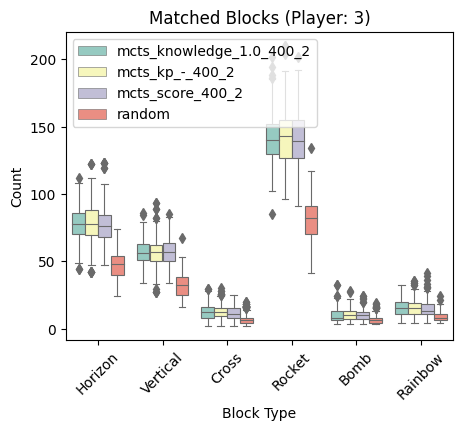

In [404]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75',
        'Matched_HorizontalPiece':'Horizon',
        'Matched_VerticalPiece':'Vertical',
        'Matched_CrossPiece':'Cross',
        'Matched_RocketPiece':'Rocket',
        'Matched_BombPiece':'Bomb',
        'Matched_RainbowPiece':'Rainbow',

    }, inplace=True)

    _columns = [
    # '25', '50', '75', '100',
    'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
    ]

    # print(player_df.keys())
    sns.set_palette('Set3')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Matched Blocks (Player: {player_no})')
    ax.set_xlabel('Block Type')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.savefig(f'./figures/block_counts_p{player_no}', dpi=300)
    plt.show()

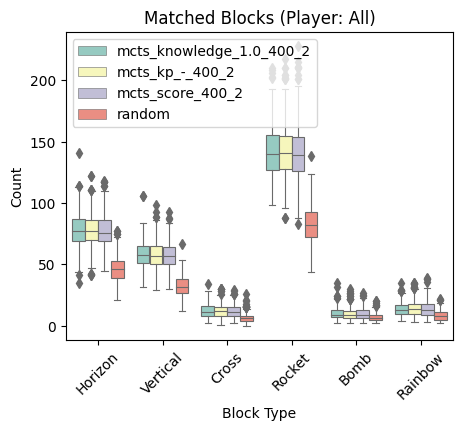

In [405]:

player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()

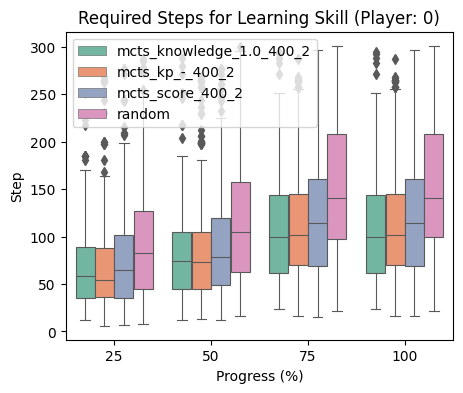

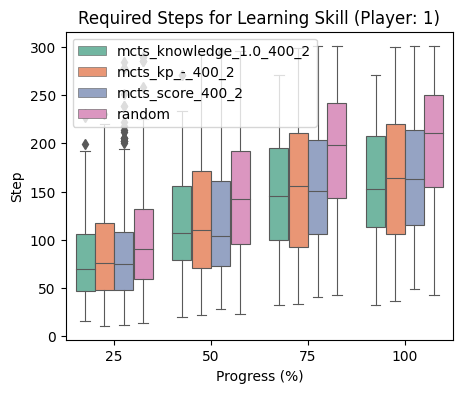

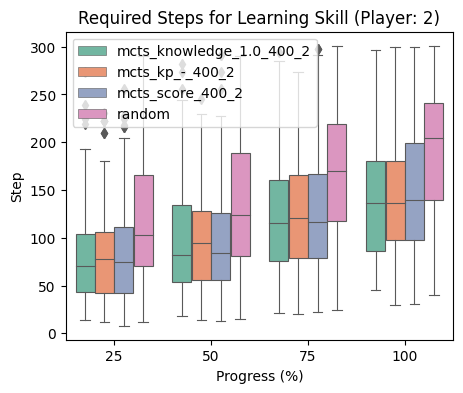

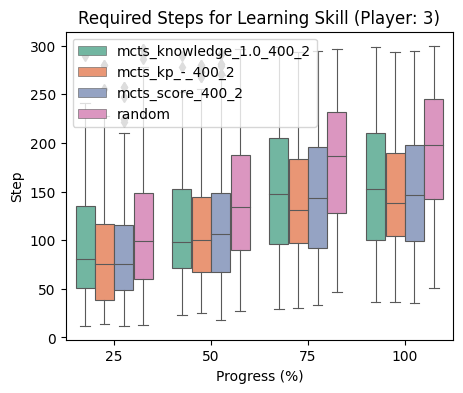

In [406]:

for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

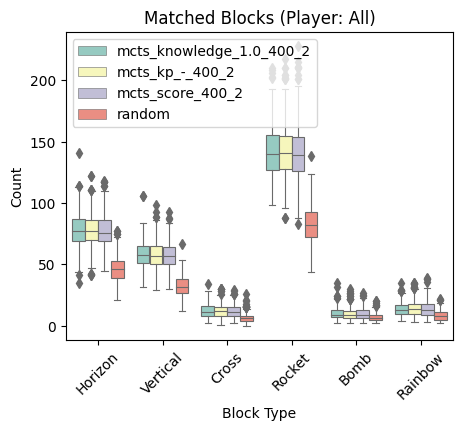

In [407]:

player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()
